## Clone the Repository

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1021, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 1021 (delta 173), reused 205 (delta 132), pack-reused 738
Receiving objects: 100% (1021/1021), 9.72 MiB | 12.30 MiB/s, done.
Resolving deltas: 100% (671/671), done.


We will execute all the code within the cloned project directory, that is `fastercnn-pytorch-training-pipeline`.

In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/kaggle/working/fastercnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 999.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 27.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 56.2 MB/s eta 0:00:00
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp37-cp37m-linux_x86_64.whl size=373761 sha256=b91450986acc0b1983fc231c34832da3ac347f4405a141e458222feb3625bdfe
  Stored in directory: /root/.cache/pip/wheels/06/f6/f9/9cc49c6de8e3cf27dfddd91bf46595a057141d4583a2adaf03
Successfully built pycocotools
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
  Attempting uninstall: setuptools
    Found existing installa

## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [ ]:
!curl -L "https://public.roboflow.com/ds/CNyGy97q45?key=eSpwiC1Ah7" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

## Create the Custom Dataset YAML File

The YAML file should contain:
* `TRAIN_DIR_IMAGES`: Path to the training images directory.
* `TRAIN_DIR_LABELS`: Path to the training labels directory containing the XML files. Can be the same as `TRAIN_DIR_IMAGES`.
* `VALID_DIR_IMAGES`: Path to the validation images directory.
* `VALID_DIR_LABELS`: Path to the validation labels directory containing the XML files. Can be the same as `VALID_DIR_IMAGES`.
* `CLASSES`: All the class names in the dataset along with the `__background__` class as the first class.
* `NC`: The number of classes. This should be the number of classes in the dataset + the background class. If the number of classes in the dataset are 7, then `NC` should be 8.
* `SAVE_VALID_PREDICTION_IMAGES`: Whether to save the prediction results from the validation loop or not.

In [5]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: [
    '__background__',
    'fish', 'jellyfish', 'penguin', 
    'shark', 'puffin', 'stingray',
    'starfish'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 8

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


## Training

For this training example we use:
* The official Faster RCNN ResNet50 FPN model.
* Batch size of 8. You may change it according to the GPU memory available.

In [6]:
!wandb disabled

W&B disabled.


In [7]:
# Train the Aquarium dataset for 30 epochs.
!python train.py --config data_configs/custom_data.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --project-name custom_training --batch-size 4 --no-mosaic

Not using distributed mode
device cuda
Creating data loaders
/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Number of training samples: 448
Number of validation samples: 127

Building model from scratch...
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|█████████████████████████████████████████| 167M/167M [00:01<00:00, 146MB/s]
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                              

## Visualize Validation Results

Check out a few validation results from `outputs/training/custom_training` directory.

In [8]:
import matplotlib.pyplot as plt
import glob as glob

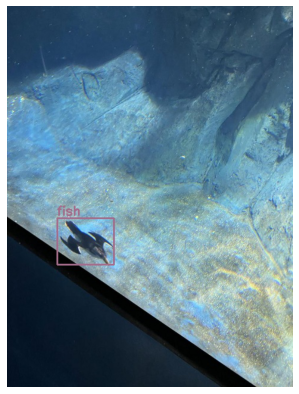

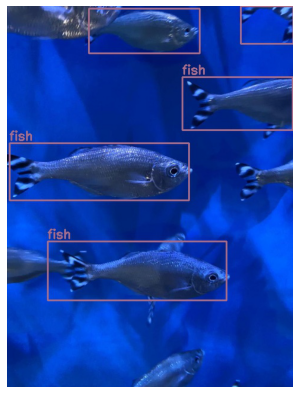

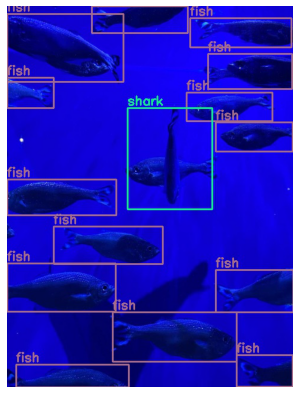

In [9]:
results_dir_path = 'outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Check Out the Repo for Latest Updates

https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

In [12]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|███████████████████████████████████████████| 16/16 [00:13<00:00,  1.14it/s]


{'map': tensor(0.3319),
 'map_50': tensor(0.5910),
 'map_75': tensor(0.3232),
 'map_large': tensor(0.4238),
 'map_medium': tensor(0.3302),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.1282),
 'mar_1': tensor(0.1850),
 'mar_10': tensor(0.4125),
 'mar_100': tensor(0.4996),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.6146),
 'mar_medium': tensor(0.4923),
 'mar_small': tensor(0.2953)}


In [13]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|███████████████████████████████████████████| 16/16 [00:14<00:00,  1.13it/s]


{'map': tensor(0.3319),
 'map_50': tensor(0.5910),
 'map_75': tensor(0.3232),
 'map_large': tensor(0.4238),
 'map_medium': tensor(0.3302),
 'map_per_class': tensor([0.3589, 0.4436, 0.2277, 0.3253, 0.1170, 0.4000, 0.4507]),
 'map_small': tensor(0.1282),
 'mar_1': tensor(0.1850),
 'mar_10': tensor(0.4125),
 'mar_100': tensor(0.4996),
 'mar_100_per_class': tensor([0.5370, 0.5826, 0.4663, 0.5123, 0.3189, 0.5394, 0.5407]),
 'mar_large': tensor(0.6146),
 'mar_med